In [1]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

<Figure size 640x480 with 1 Axes>

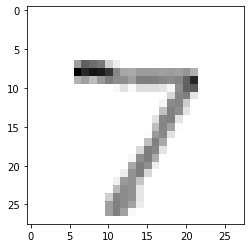

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])



In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',  # 학습 알고리즘 선택
             loss='sparse_categorical_crossentropy', # loss 최소화 함수
             metrics=['accuracy'])  # 정확도 저장
model.fit(x_train, y_train, epochs=3)  # 모델 학습


Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.2716 - acc: 0.9207
Epoch 2/3
60000/60000 [==============================] - 7s 125us/sample - loss: 0.1090 - acc: 0.9662
Epoch 3/3
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0752 - acc: 0.9759


In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # 테스트 데이터로 loss 및 accurary 확인

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0937 - acc: 0.9700


In [8]:
print(val_loss)
print(val_acc)

0.09374042731458321
0.97


In [9]:
model.save('my_mnist.model')
new_model = tf.keras.models.load_model('my_mnist.model')
predictions = new_model.predict(x_test)
print(predictions)

[[4.7284566e-08 4.0595729e-08 6.7685812e-07 ... 9.9994922e-01
  2.5069523e-08 1.1309914e-05]
 [1.7267849e-09 4.9149398e-06 9.9996305e-01 ... 2.3079615e-10
  2.3739051e-06 5.6003742e-14]
 [1.4245587e-06 9.9965525e-01 3.4010354e-05 ... 4.9469811e-05
  1.4717919e-04 1.1279099e-06]
 ...
 [3.9756408e-08 1.0827478e-06 9.6858308e-08 ... 8.7456850e-05
  1.9442632e-05 2.3749364e-03]
 [1.5861075e-07 1.8207682e-07 1.1528660e-09 ... 7.7146048e-08
  3.9286911e-04 1.8832752e-08]
 [5.0285140e-09 4.1454061e-07 3.2433942e-07 ... 7.5146150e-10
  2.2697215e-09 8.7801855e-09]]


In [10]:
import numpy as np
print(np.argmax(predictions[0]))

7


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

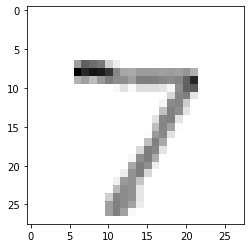

In [13]:
print(x_test[0])
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()